In [85]:
import os 
import json
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, mean_squared_error

In [86]:
import os
# Office
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\Loan Prediction')
#data = pd.read_csv('LoanTrain.csv')

# Personal
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediction')
data = pd.read_csv('Loan Prediction Train.csv')

#### Listing the columns persent in the dataset

In [87]:
list(data.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [88]:
data.shape[0]

614

In [89]:
len(data['Loan_ID'].unique())

614

In [90]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
a=data.reset_index(drop=True)

In [92]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
## Verifying the Constant Fields

In [94]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Handling the Missing Values

In [95]:
data.loc[data['Gender'].isnull(),'Gender']='Trasgender'
data.loc[data['Dependents'].isnull(),'Dependents']='0'
data.loc[data['Married'].isnull(),'Married']='No'
data.loc[data['Self_Employed'].isnull(),'Self_Employed']='No'
data=data.drop(index=data.loc[data['LoanAmount'].isnull(),:].index)
data.loc[data['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=0
data.loc[data['Credit_History'].isnull(),'Credit_History']=0

In [96]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
Numeric_columns=data.select_dtypes(include=['int64','float64'])
categorical_columns=data.select_dtypes(include=['object'])
print(Numeric_columns.columns)
print(categorical_columns.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


#### Constant Values in Numeric Columns

In [98]:
from sklearn.feature_selection import VarianceThreshold

#Using a Built In Function
sel = VarianceThreshold(threshold=0)
sel.fit(Numeric_columns)  # fit finds the features with zero variance
print('Total # of non constant features',sum(sel.get_support()))
sel.transform(Numeric_columns)
Nonconstant_Numeric=Numeric_columns.loc[:,list(sel.get_support())]
#Nonconstant_Numeric

##Generic Way
#constant_numeric_features=[i for i in Numeric_columns.columns if Numeric_columns[i].std()==0]
#constant_numeric_features

Total # of non constant features 5


#### Constant Values in Categorical Columns

In [99]:
unique_columns=[]
for i in categorical_columns.columns:
    if len(categorical_columns[i].unique())==1:
        unique_columns.append(i)
print(unique_columns)

[]


#### Merging the two dataframes

In [100]:
new_df=pd.concat([categorical_columns,Nonconstant_Numeric],axis=1)
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [101]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y,5417,4196.0,267.0,360.0,1.0


#### Removing the unique key columns

In [102]:
unique_columns=[i for i in new_df.columns if len(new_df[i].unique())==new_df.shape[0]]
print(unique_columns)

['Loan_ID']


#### Dropping the unique key columns

In [103]:
new_df=new_df.drop(unique_columns,axis=1)

#### Type conversion

In [104]:
new_df['Credit_History']=new_df['Credit_History'].astype(str)

#### Univariate Analysis

Plot for:  Gender


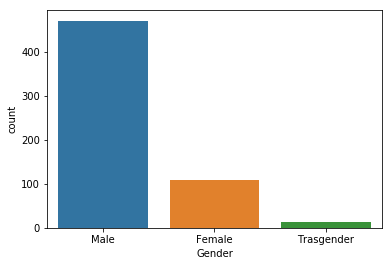

Plot for:  Married


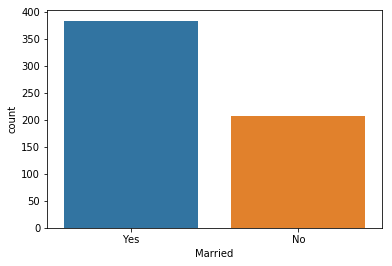

Plot for:  Dependents


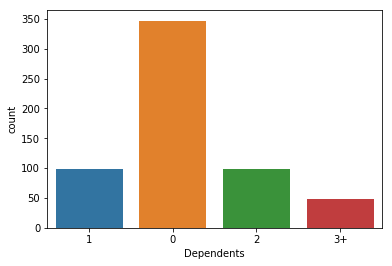

Plot for:  Education


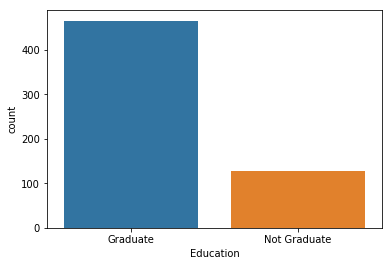

Plot for:  Self_Employed


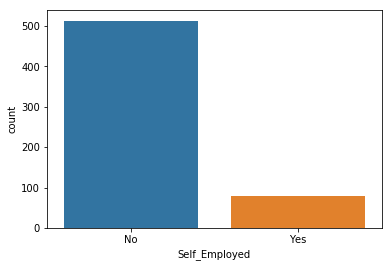

Plot for:  Property_Area


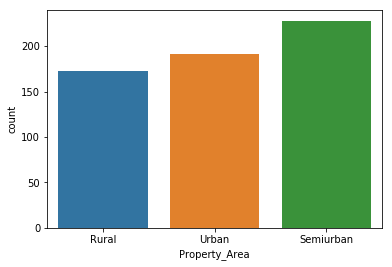

Plot for:  Loan_Status


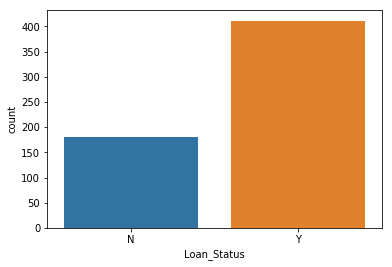

Plot for:  Credit_History


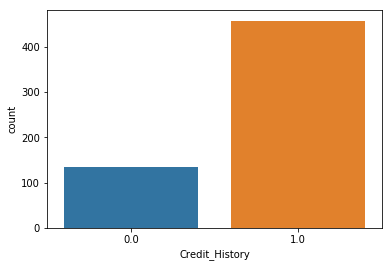

In [105]:
for feat in new_df.select_dtypes(include=['object']).columns:
    print('Plot for: ',feat)
    sns.countplot(new_df[feat])
    plt.show()

Plot for:  Gender  vs Loan Status


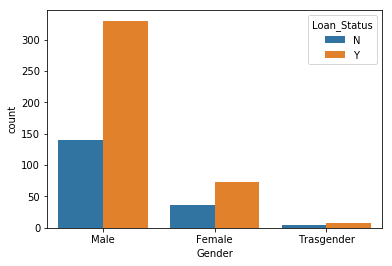

Plot for:  Married  vs Loan Status


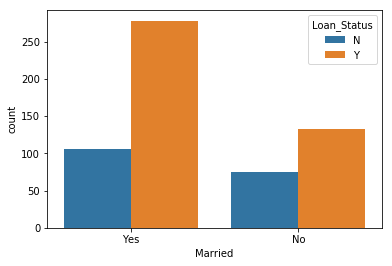

Plot for:  Dependents  vs Loan Status


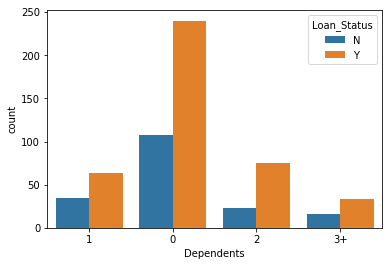

Plot for:  Education  vs Loan Status


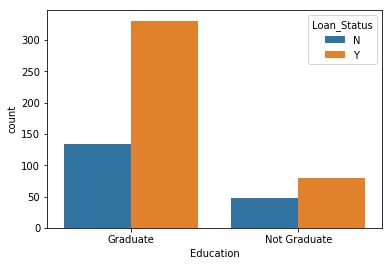

Plot for:  Self_Employed  vs Loan Status


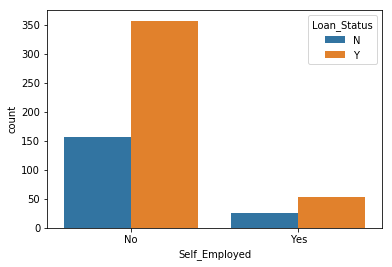

Plot for:  Property_Area  vs Loan Status


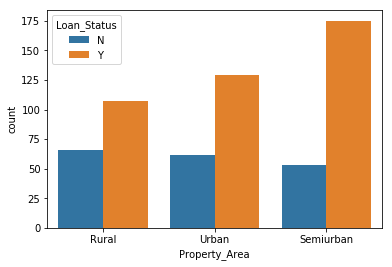

Plot for:  Credit_History  vs Loan Status


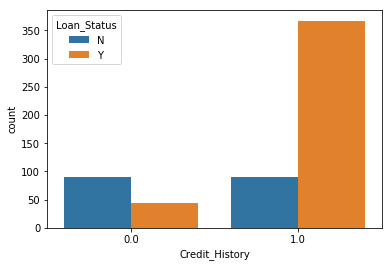

In [106]:
for feat in new_df.select_dtypes(include=['object']).columns:
    if feat !='Loan_Status':
        print('Plot for: ',feat,' vs Loan Status')
        sns.countplot(new_df[feat],hue=new_df['Loan_Status'])
        plt.show()

In [107]:
## Unmarried ppl are more likely to get a loan, hence considering the "Married column" for future analysis
## Persons with zero or 1 dependents are more likely to get a loan, hence considering "Dependents column" for future analysis
## Graduates are more likely to get a loan when compared to "Not Graduate"
## Non Self employees are more likely to get a loan when compared to self employeed 

#### Removing the gender column as this is not explaining the output variable
#new_df=new_df.drop(['Gender'],axis=1)

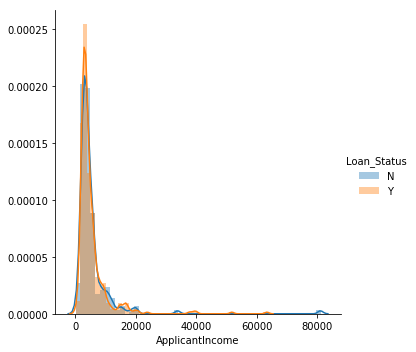

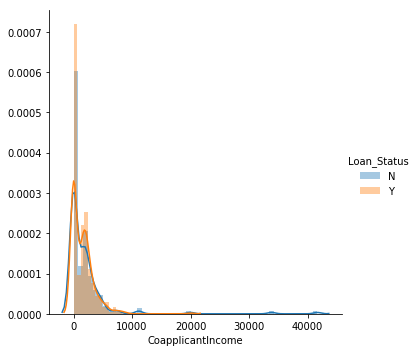

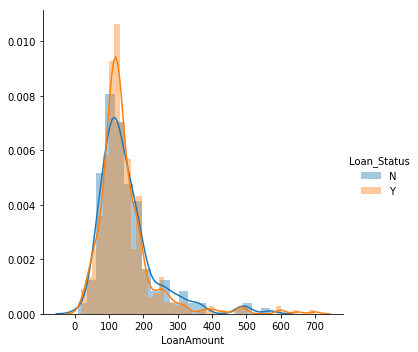

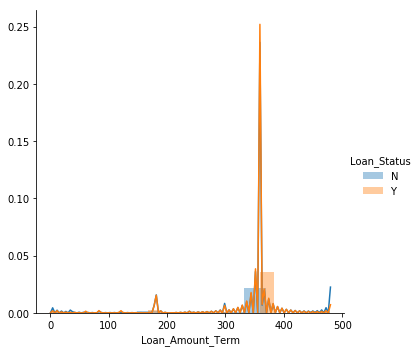

In [108]:
for feat in new_df.select_dtypes(include=['int64','float64']).columns:
    sns.FacetGrid(new_df,hue='Loan_Status',aspect=1,size=5)\
        .map(sns.distplot,feat)\
        .add_legend()
plt.show()

In [109]:
corr=pd.DataFrame(new_df.select_dtypes(include=['int64','float64']).corr())
print(corr)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.113695    0.570909   
CoapplicantIncome        -0.113695           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.016667          -0.049350    0.065089   

                   Loan_Amount_Term  
ApplicantIncome           -0.016667  
CoapplicantIncome         -0.049350  
LoanAmount                 0.065089  
Loan_Amount_Term           1.000000  


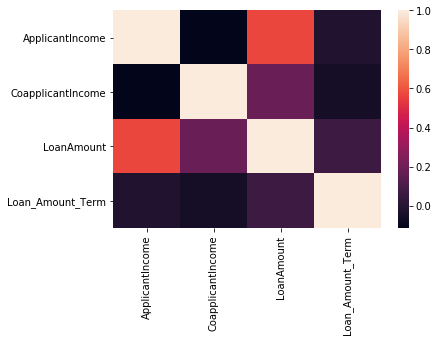

In [110]:
sns.heatmap(corr)

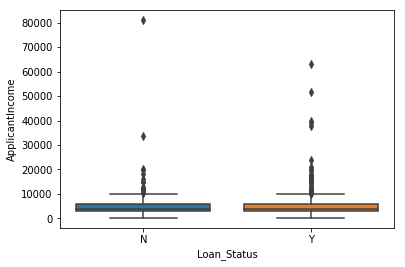

In [111]:
sns.boxplot('Loan_Status','ApplicantIncome',data=new_df)

Feature:  ApplicantIncome


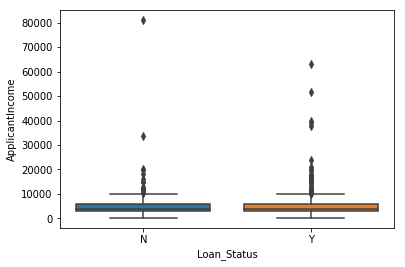

Feature:  CoapplicantIncome


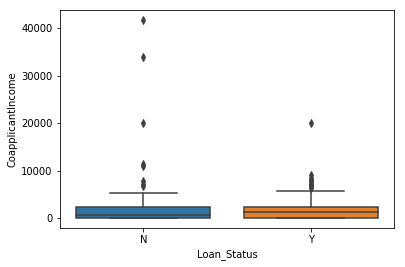

Feature:  LoanAmount


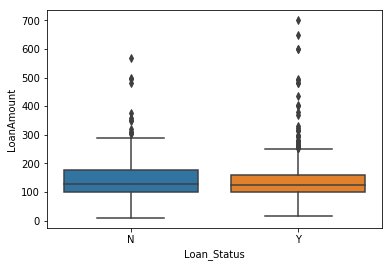

Feature:  Loan_Amount_Term


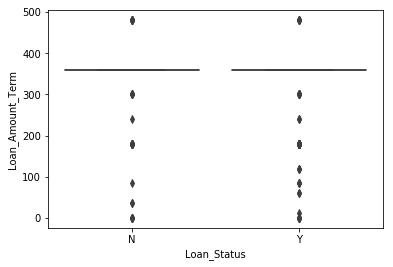

In [112]:
for feat in new_df.select_dtypes(include=['int64','float64']).columns:
    print("Feature: ", feat)
    sns.boxplot('Loan_Status',feat,data=new_df)
    plt.show()

In [113]:
IQR=new_df['ApplicantIncome'].quantile(0.75)-new_df['ApplicantIncome'].quantile(0.25)
upper_fence=new_df['ApplicantIncome'].quantile(0.75)+(IQR*3)
lower_fence=new_df['ApplicantIncome'].quantile(0.75)-(IQR*3)
print(IQR,'  ', upper_fence,'  ',lower_fence)
new_df=new_df.loc[(new_df['ApplicantIncome']<=upper_fence) & (new_df['ApplicantIncome']>=lower_fence), :]

2867.25    14356.25    -2847.25


(array([ 17.,   6.,   3.,  39.,   0.,   3.,  12., 467.,   0.,  14.]),
 array([  0.,  48.,  96., 144., 192., 240., 288., 336., 384., 432., 480.]),
 <a list of 10 Patch objects>)

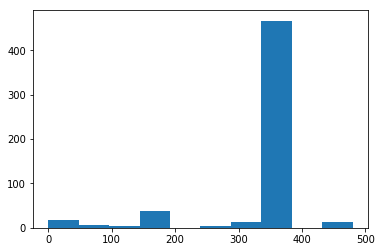

In [114]:
plt.hist(new_df['Loan_Amount_Term'])

In [115]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
5,Male,Yes,2,Graduate,Yes,Urban,Y,5417,4196.0,267.0,360.0,1.0


In [116]:
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
encoding_minmax=defaultdict(MinMaxScaler)
features_num=['ApplicantIncome']
for feat in features_num:
    encoded_df=pd.DataFrame()
    #d=pd.DataFrame(encoding_minmax(feat).fit_transform(new_df[feat]))
    d=pd.DataFrame(encoding_minmax[feat].fit_transform(new_df[[feat]]))
    test_column=d.columns.values
    list_column=[feat+'_'+'minmax' for j in test_column]
    d.columns=list_column
    encoded_df=pd.concat([encoded_df,d],axis=1).reset_index(drop=True)
    new_df.drop(feat,axis=1,inplace=True)
    new_df=new_df.reset_index(drop=True)
    new_df=pd.concat([new_df,encoded_df],axis=1)
import pickle
with open('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediction\\minmax_pickle.pkl','wb') as f:
    pickle.dump(encoding_minmax,f)

In [117]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_minmax
0,Male,Yes,1,Graduate,No,Rural,N,1508.0,128.0,360.0,1.0,0.338087
1,Male,Yes,0,Graduate,Yes,Urban,Y,0.0,66.0,360.0,1.0,0.217358
2,Male,Yes,0,Not Graduate,No,Urban,Y,2358.0,120.0,360.0,1.0,0.185555
3,Male,No,0,Graduate,No,Urban,Y,0.0,141.0,360.0,1.0,0.446156
4,Male,Yes,2,Graduate,Yes,Urban,Y,4196.0,267.0,360.0,1.0,0.401693


In [118]:
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
encoding_standardscaler=defaultdict(StandardScaler)
features_num=['LoanAmount']
for feat in features_num:
    encoded_df=pd.DataFrame()
    #d=pd.DataFrame(encoding_minmax(feat).fit_transform(new_df[feat]))
    d=pd.DataFrame(encoding_standardscaler[feat].fit_transform(new_df[[feat]]))
    test_column=d.columns.values
    list_column=[feat+'_'+'minmax' for j in test_column]
    d.columns=list_column
    encoded_df=pd.concat([encoded_df,d],axis=1).reset_index(drop=True)
    new_df.drop(feat,axis=1,inplace=True)
    new_df=new_df.reset_index(drop=True)
    new_df=pd.concat([new_df,encoded_df],axis=1)
with open('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediction\\standardscaler_pickle.pkl','wb') as f:
    pickle.dump(encoding_standardscaler,f)

In [119]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_minmax,LoanAmount_minmax
0,Male,Yes,1,Graduate,No,Rural,N,1508.0,360.0,1.0,0.338087,-0.140316
1,Male,Yes,0,Graduate,Yes,Urban,Y,0.0,360.0,1.0,0.217358,-1.111555
2,Male,Yes,0,Not Graduate,No,Urban,Y,2358.0,360.0,1.0,0.185555,-0.265637
3,Male,No,0,Graduate,No,Urban,Y,0.0,360.0,1.0,0.446156,0.063331
4,Male,Yes,2,Graduate,Yes,Urban,Y,4196.0,360.0,1.0,0.401693,2.037139


#### Engineering the Rare Variables

In [120]:
for feat in new_df.select_dtypes(include='object'):
    print('Feature counts of variable: ',feat)
    print(new_df[feat].value_counts())
    print('----------------------------------')

Feature counts of variable:  Gender
Male          447
Female        104
Trasgender     10
Name: Gender, dtype: int64
----------------------------------
Feature counts of variable:  Married
Yes    361
No     200
Name: Married, dtype: int64
----------------------------------
Feature counts of variable:  Dependents
0     331
2      94
1      92
3+     44
Name: Dependents, dtype: int64
----------------------------------
Feature counts of variable:  Education
Graduate        436
Not Graduate    125
Name: Education, dtype: int64
----------------------------------
Feature counts of variable:  Self_Employed
No     493
Yes     68
Name: Self_Employed, dtype: int64
----------------------------------
Feature counts of variable:  Property_Area
Semiurban    216
Urban        181
Rural        164
Name: Property_Area, dtype: int64
----------------------------------
Feature counts of variable:  Loan_Status
Y    388
N    173
Name: Loan_Status, dtype: int64
----------------------------------
Feature count

In [121]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_minmax,LoanAmount_minmax
0,Male,Yes,1,Graduate,No,Rural,N,1508.0,360.0,1.0,0.338087,-0.140316
1,Male,Yes,0,Graduate,Yes,Urban,Y,0.0,360.0,1.0,0.217358,-1.111555
2,Male,Yes,0,Not Graduate,No,Urban,Y,2358.0,360.0,1.0,0.185555,-0.265637
3,Male,No,0,Graduate,No,Urban,Y,0.0,360.0,1.0,0.446156,0.063331
4,Male,Yes,2,Graduate,Yes,Urban,Y,4196.0,360.0,1.0,0.401693,2.037139


#### One Hot Encoding

In [122]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding_binarizer=defaultdict(LabelBinarizer)
col_nominal=['Self_Employed','Married','Gender']
for feat in col_nominal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding_binarizer[feat].fit_transform(new_df[feat]))
    test_column=d.columns.values
    list_columns=[feat+'_'+str(j) for j in test_column]
    #print(list_columns)
    d.columns=list_columns
    #print(d.head())
    encoded_df=pd.concat([encoded_df,d],axis=1).reset_index(drop=True)
    new_df.drop(feat,axis=1,inplace=True)
    new_df=new_df.reset_index(drop=True)
    new_df=pd.concat([new_df,encoded_df],axis=1)
with open('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediction\\binarizer_pickle.pkl','wb') as f:
    pickle.dump(encoding_binarizer,f)

In [123]:
new_df.head()

,Dependents,Education,Property_Area,Loan_Status,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_minmax,LoanAmount_minmax,Self_Employed_0,Married_0,Gender_0,Gender_1,Gender_2
0,1,Graduate,Rural,N,1508.0,360.0,1.0,0.338087,-0.140316,0,1,0,1,0
1,0,Graduate,Urban,Y,0.0,360.0,1.0,0.217358,-1.111555,1,1,0,1,0
2,0,Not Graduate,Urban,Y,2358.0,360.0,1.0,0.185555,-0.265637,0,1,0,1,0
3,0,Graduate,Urban,Y,0.0,360.0,1.0,0.446156,0.063331,0,0,0,1,0
4,2,Graduate,Urban,Y,4196.0,360.0,1.0,0.401693,2.037139,1,1,0,1,0


#### Label Encoding

In [124]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
encoding_labelencoder=defaultdict(LabelEncoder)
col_ordinal=['Education','Property_Area','Loan_Status','Dependents','Credit_History']
for feat in col_ordinal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding_labelencoder[feat].fit_transform(new_df[feat]))
    test_column=d.columns.values
    list_columns=[feat+'_'+str(j) for j in test_column]
    d.columns=list_columns
    encoded_df=pd.concat([encoded_df,d],axis=1).reset_index(drop=True)
    new_df.drop(feat,axis=1,inplace=True)
    new_df=new_df.reset_index(drop=True)
    new_df=pd.concat([new_df,encoded_df],axis=1)
with open('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediction\\labelencoder_pickle.pkl','wb') as f:
    pickle.dump(encoding_labelencoder,f)

In [125]:
encoding_labelencoder['Dependents']

LabelEncoder()

In [126]:
new_df['Dependents_0'].unique()

array([1, 0, 2, 3], dtype=int64)

#### Train Test Split

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_df.drop('Loan_Status_0',axis=1),new_df['Loan_Status_0'],test_size=0.30,random_state=42)
X_train.shape, X_test.shape

((392, 13), (169, 13))

In [128]:
X_train.columns

Index(['CoapplicantIncome', 'Loan_Amount_Term', 'ApplicantIncome_minmax',
       'LoanAmount_minmax', 'Self_Employed_0', 'Married_0', 'Gender_0',
       'Gender_1', 'Gender_2', 'Education_0', 'Property_Area_0',
       'Dependents_0', 'Credit_History_0'],
      dtype='object')

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreProcessing(BaseEstimator, TransformerMixin):


    def __init__(self):
        pass

    def transform(self, df):

        pred_var = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
        
        df = df[pred_var]
        
        #f['Dependents'] = df['Dependents'].fillna(0)
        df['Self_Employed'] = df['Self_Employed'].fillna('No')
        df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(self.term_mean_)
        df['Credit_History'] = df['Credit_History'].fillna(1)
        df['Married'] = df['Married'].fillna('No')
        df['Gender'] = df['Gender'].fillna('Male')
        df['LoanAmount'] = df['LoanAmount'].fillna(self.amt_mean_)
        
        
        
        return df.as_matrix()

    def fit(self, df, y=None, **fit_params):
        
        self.term_mean_ = df['Loan_Amount_Term'].mean()
        self.amt_mean_ = df['LoanAmount'].mean()
        return self

In [90]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
preprocess = PreProcessing()

In [91]:
preprocess.fit(data)

PreProcessing()

In [93]:
data_transformed = preprocess.transform(data)

In [95]:
data_transformed

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[pred_var], data['Loan_Status'], \
                                                    test_size=0.25, random_state=42)

#### Forward Feature Selection

In [949]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)
selected_feat=X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   11.2s finished

[2018-11-30 17:18:48] Features: 1/5 -- score: 0.7075974495882962[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   10.3s finished

[2018-11-30 17:18:59] Features: 2/5 -- score: 0.7572830487590214[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.8s finished

[2018-11-30 17:19:09] Features: 3/5 -- score: 0.7773340472139099[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    9.2s finished

[2018-11-30 17:19:18] Features: 4/5 -- score: 0.7762730055350192[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    8.4s

Index(['Credit_History_0', 'Credit_History_0', 'Married_0', 'Education_0',
       'Credit_History_0'],
      dtype='object')

#### Applying Random Forest Classifier

In [858]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [859]:
from sklearn.metrics import roc_auc_score, mean_squared_error
run_randomForests(X_train.fillna(0),
                  X_test.fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8882121439280359
Test set
Random Forests roc-auc: 0.6843671679197995


In [860]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:4]].fillna(0)), y_train)
selected_feat= X_train.columns[list(efs1.best_idx_)]
print(selected_feat)

Features: 15/15

Index(['CoapplicantIncome', 'Loan_Amount_Term'], dtype='object')


#### Lasso Regression using Logistic Regerssion

In [861]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, and I
# make sure I select the Lasso (l1) penalty.

# Then I use the selectFromModel object from sklearn, which
# will select in theory the features which coefficients are non-zero
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [862]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 10
selected features: 10
features with coefficients shrank to zero: 0


#### Using Random Shuffling

In [863]:
# The first step to determine feature importance by feature shuffling
# is to build the machine learning model for which we want to 
# select features

# In this case, I will build Random Forests, but remember that 
# you can use this procedure for any other machine learning algorithm

# I build few and shallow trees to avoid overfitting
rf = RandomForestClassifier(
    n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)

rf.fit(X_train.fillna(0), y_train)

# print roc-auc in train and testing sets
print('train auc score: ',
      roc_auc_score(y_train, (rf.predict_proba(X_train.fillna(0)))[:, 1]))
print('test auc score: ',
      roc_auc_score(y_test, (rf.predict_proba(X_test.fillna(0)))[:, 1]))

train auc score:  0.8264773863068466
test auc score:  0.662672305764411


In [864]:
# in this cell, I will shuffle one by one, each feature of the dataset
# and then use the dataset with the shuffled variable to make predictions
# using the random forests I trained in the previous cell

# overall train roc-auc: using all the features
train_auc = roc_auc_score(y_train, (rf.predict_proba(X_train.fillna(0)))[:, 1])

# dictionary to capture the features and the drop in auc that they
# cause when shuffled
feature_dict = {}

# selection  logic
for feature in X_train.columns:
    X_train_c = X_train.copy()
    
    # shuffle individual feature
    X_train_c[feature] = X_train_c[feature].sample(frac=1).reset_index(
        drop=True)
    
    # make prediction with shuffled feature and calculate roc-auc
    shuff_auc = roc_auc_score(y_train,
                              (rf.predict_proba(X_train_c.fillna(0)))[:, 1])
    
    # save the drop in roc-auc
    feature_dict[feature] = (train_auc - shuff_auc)


In [865]:
# let's have a look at the generated dictionary
feature_dict

{'ApplicantIncome': 0.05403548225887067,
 'CoapplicantIncome': 0.026564842578710723,
 'LoanAmount': 0.0126030734632685,
 'Loan_Amount_Term': 0.018006621689155455,
 'Self_Employed_0': 0.002420664667666328,
 'Married_0': 0.014367816091954033,
 'Education_0': 0.026939655172413923,
 'Property_Area_0': 0.007465017491254389,
 'Dependents_0': 0.0074337831084458905,
 'Credit_History_0': 0.21217516241879064}

In [866]:
# Now I will transform the dictionary into a pandas dataframe
# for easy manipulation

feature_importance = pd.Series(feature_dict).reset_index()
feature_importance.columns = ['feature', 'auc_drop']
feature_importance.head()

,feature,auc_drop
0,ApplicantIncome,0.054035
1,CoapplicantIncome,0.026565
2,LoanAmount,0.012603
3,Loan_Amount_Term,0.018007
4,Self_Employed_0,0.002421


#### Hybrid method: Recursive feature elimination

In [871]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Self_Employed_0,Married_0,Education_0,Property_Area_0,Dependents_0,Credit_History_0
249,3237,0.0,30.0,360.0,0,0,0,2,0,1
460,4050,5302.0,138.0,360.0,0,1,1,0,1,0
19,7660,0.0,104.0,360.0,0,1,1,2,0,0
395,2717,0.0,60.0,180.0,0,0,1,2,0,1
56,8080,2250.0,180.0,360.0,0,1,0,2,1,1


In [873]:
# the first step of this procedure  consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
import xgboost as xgb
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBClassifier(nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the roc-auc in the test set
y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
auc_score_all = roc_auc_score(y_test, y_pred_test)
print('Test all features xgb ROC AUC=%f' % (auc_score_all))

Test all features xgb ROC AUC=0.703008


['ApplicantIncome',
 'LoanAmount',
 'CoapplicantIncome',
 'Property_Area_0',
 'Dependents_0',
 'Credit_History_0',
 'Loan_Amount_Term',
 'Education_0',
 'Married_0',
 'Self_Employed_0']

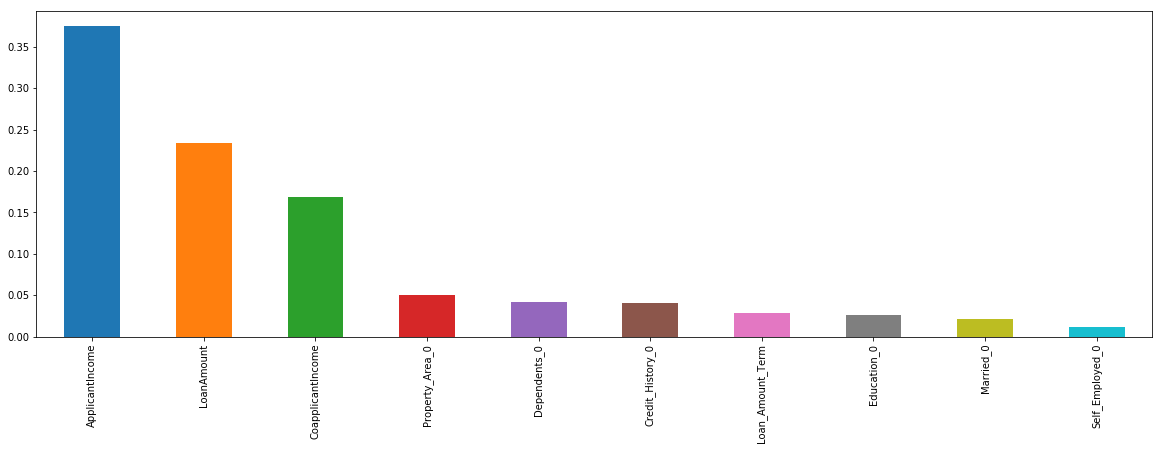

In [874]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the most to the least
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

# view the list of ordered features
features = list(features.index)
features

In [875]:
# the final step consists in removing one at a time
# all the features, from the least to the most
# important, and build an xgboost at each round.

# once we build the model, we calculate the new roc-auc
# if the new roc-auc is smaller than the original one
# (with all the features), then that feature that was removed
# was important, and we should keep it.
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in roc-auc
# if the drop is below this threshold,
# the feature will be removed
tol = 0.0005

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBClassifier(
        nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict_proba(
        X_test.drop(features_to_remove + [feature], axis=1))[:, 1]

    # calculate the new roc-auc
    auc_score_int = roc_auc_score(y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))

    # print the original roc-auc with all the features
    print('All features Test ROC AUC={}'.format((auc_score_all)))

    # determine the drop in the roc-auc
    diff_auc = auc_score_all - auc_score_int

    # compare the drop in roc-auc with the tolerance
    # we set previously
    if diff_auc >= tol:
        print('Drop in ROC AUC={}'.format(diff_auc))
        print('keep: ', feature)
        print
    else:
        print('Drop in ROC AUC={}'.format(diff_auc))
        print('remove: ', feature)
        print
        # if the drop in the roc is small and we remove the
        # feature, we need to set the new roc to the one based on
        # the remaining features
        auc_score_all = auc_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  ApplicantIncome  which is feature  1  out of  10
New Test ROC AUC=0.6965852130325814
All features Test ROC AUC=0.7030075187969924
Drop in ROC AUC=0.0064223057644110515
keep:  ApplicantIncome

testing feature:  LoanAmount  which is feature  2  out of  10
New Test ROC AUC=0.6718358395989975
All features Test ROC AUC=0.7030075187969924
Drop in ROC AUC=0.031171679197994906
keep:  LoanAmount

testing feature:  CoapplicantIncome  which is feature  3  out of  10
New Test ROC AUC=0.6928258145363408
All features Test ROC AUC=0.7030075187969924
Drop in ROC AUC=0.01018170426065157
keep:  CoapplicantIncome

testing feature:  Property_Area_0  which is feature  4  out of  10
New Test ROC AUC=0.6724624060150375
All features Test ROC AUC=0.7030075187969924
Drop in ROC AUC=0.03054511278195493
keep:  Property_Area_0

testing feature:  Dependents_0  which is feature  5  out of  10
New Test ROC AUC=0.7073934837092732
All features Test ROC AUC=0.703007

#### Applying  KNN

In [876]:
from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier(n_neighbors=17)
KNNC.fit(X_train,y_train)
KNNC_Train_Prediction=KNNC.predict(X_train)
KNNC_Test_Prediction=KNNC.predict(X_test)

print(KNNC.get_params)

from sklearn.metrics import confusion_matrix
CF_train=confusion_matrix(y_train,KNNC_Train_Prediction)
CF_test=confusion_matrix(y_test,KNNC_Test_Prediction)
print('Confusion Metrics:\n',CF_train)

import numpy as np
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score
train_accuracy=accuracy_score(y_train,KNNC_Train_Prediction)
test_accuracy=accuracy_score(y_test,KNNC_Test_Prediction)
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)

train_precision=precision_score(y_train,KNNC_Train_Prediction,average='macro')
test_precision=precision_score(y_test,KNNC_Test_Prediction,average='macro')
print('Train precision:',train_precision)
print('Test precision:',test_precision)

train_recall=recall_score(y_train,KNNC_Train_Prediction,average='macro')
test_recall=recall_score(y_test,KNNC_Test_Prediction,average='macro')
print('Train recall:',train_recall)
print('Test recall:',test_recall)


#train_roc_auc_score=roc_auc_score(y_train,KNNC_Train_Prediction)
#test_roc_auc_score=roc_auc_score(y_test,KNNC_Test_Prediction)
#print('Train roc score:',train_roc_auc_score)
#print('Test roc score:',test_roc_auc_score)


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')>
Confusion Metrics:
 [[ 13 103]
 [  6 270]]
Train accuracy: 0.7219387755102041
Test accuracy: 0.6686390532544378
Train precision: 0.7040355580640609
Test precision: 0.6221340388007055
Train recall: 0.5451649175412294
Test recall: 0.5216948621553885


##### ROC Curve

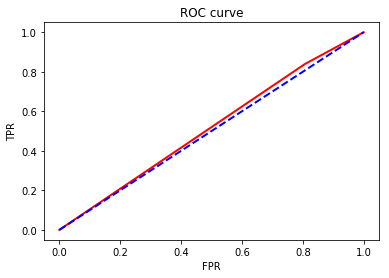

In [877]:
# Pre requisite:
#We should convert the output variable into numeric using lable_binarize

from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier()
KNNC.fit(X_train,y_train)
KNNC_Train_Prediction=KNNC.predict(X_train)
KNNC_Test_Prediction=KNNC.predict(X_test)

from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,KNNC_Test_Prediction,drop_intermediate=False)

# Plotting the ROC graph

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### roc_curve_scores

In [878]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,KNNC_Test_Prediction)

0.5161340852130326

In [423]:
score=['precision']
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
scores=['precision', 'recall','f1','roc_auc']
scoring = {'AUC': 'roc_auc'}
for score in scores:
    print('***********************************',score,'***********************************')
    parameters={'n_neighbors':[5,9,13,15]}
    KNNGridSearch=GridSearchCV(KNNC,parameters,cv=3,scoring='%s_macro' % score)
    KNNGridSearch.fit(X_train,y_train)
    print('Best Parameters:',KNNGridSearch.best_params_)
    print('CV Results Keys: \n',KNNGridSearch.cv_results_.keys())
    print('CV Results: \n',KNNGridSearch.cv_results_)
    print('CV Results values: \n',KNNGridSearch.cv_results_.values())

*********************************** precision ***********************************


NameError: name 'KNNC' is not defined

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

## For Classification
mi=mutual_info_classif(Numeric_X_train,y_train)
mi
mi=pd.Series(mi)
mi.index=Numeric_X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
sel_ = SelectKBest(mutual_info_classif, k=2).fit(Numeric_X_train.fillna(0), y_train)
Numeric_X_train.columns[sel_.get_support()]

#### Deploying the model

In [8]:
import os 
import json
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, mean_squared_error

In [9]:
import os
# Office
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\Loan Prediction')
#data = pd.read_csv('LoanTrain.csv')

# Personal
os.chdir('C:\\Users\\Admin\\Desktop\\Data\\Loan Prediction')
data = pd.read_csv('LoanTrain.csv')

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

class PreProcessing(BaseEstimator, TransformerMixin):


    def __init__(self):
        pass

    def transform(self, df):

        pred_var = ['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
        
        df = df[pred_var].reset_index(drop=True)
        
        #f['Dependents'] = df['Dependents'].fillna(0)
        df['Self_Employed'] = df['Self_Employed'].fillna('No')
        df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(self.term_mean_)
        df['Credit_History'] = df['Credit_History'].fillna(1)
        df['Married'] = df['Married'].fillna('No')
        df['Gender'] = df['Gender'].fillna('Male')
        df['LoanAmount'] = df['LoanAmount'].fillna(self.amt_mean_)
        
        #loading a MINMAX Scaler from a file called minmax_pickle.pkl
        MinMaxpickle_in = open("C:/Users/Admin/Desktop/Data/Loan Prediction/minmax_pickle.pkl","rb")
        MinmaxScaler_dict = pickle.load(MinMaxpickle_in)
        df['ApplicantIncome']=pd.DataFrame(MinmaxScaler_dict['ApplicantIncome'].fit_transform(df[['ApplicantIncome']]))
        
        #loading a One Hot Encoder Scaler from a file called binarizer_pickle.pkl
        Onehotpickle_in = open("C:/Users/Admin/Desktop/Data/Loan Prediction/binarizer_pickle.pkl","rb")
        Onehot_dict = pickle.load(Onehotpickle_in)
        d1=pd.DataFrame(Onehot_dict['Self_Employed'].fit_transform(df[['Self_Employed']]))
        d2=pd.DataFrame(Onehot_dict['Married'].fit_transform(df[['Married']]))
        d3=pd.DataFrame(Onehot_dict['Gender'].fit_transform(df[['Gender']]))
        d=pd.concat([d1,d2,d3],axis=1)
        col=['Self_Employed_0','Married_0','Gender_0']
        d.columns=col
        df.drop(['Self_Employed','Married','Gender'],axis=1,inplace=True)
        df=pd.concat([df,d],axis=1)
        
        ## Loading a Label encoder scaler from a file called labelencoder_pickle
        Labelencoderpickle_in = open("C:/Users/Admin/Desktop/Data/Loan Prediction/labelencoder_pickle.pkl","rb")
        Labelencoder_dict = pickle.load(Labelencoderpickle_in)
        df['Education']=pd.DataFrame(Labelencoder_dict['Education'].fit_transform(df[['Education']]))
        df['Property_Area']=pd.DataFrame(Labelencoder_dict['Property_Area'].fit_transform(df[['Property_Area']]))
        df['Credit_History']=pd.DataFrame(Labelencoder_dict['Credit_History'].fit_transform(df[['Credit_History']]))
        #df['Dependents']=pd.DataFrame(Labelencoder_dict['Dependents'].fit_transform(df[['Dependents']]))
       
        return df.as_matrix()

    def fit(self, df, y=None, **fit_params):
        
        self.term_mean_ = df['Loan_Amount_Term'].mean()
        self.amt_mean_ = df['LoanAmount'].mean()
        return self

In [11]:
pred_var = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
X_train, X_test, y_train, y_test = train_test_split(data[pred_var], data['Loan_Status'], test_size=0.25, random_state=42)

In [12]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban
304,LP001978,Male,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Rural
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban


In [407]:
preprocess = PreProcessing()

In [408]:
preprocess.fit(X_train)

PreProcessing()

In [409]:
data_transformed_xtrain = preprocess.transform(X_train)

In [410]:
pred_var = ['Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Self_Employed_0','Married_0','Gender_0']
data_transformed=pd.DataFrame(data_transformed_xtrain,columns=pred_var)
data_transformed.head()
#data_transformed['Dependents'].unique()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Self_Employed_0,Married_0,Gender_0
0,1.0,0.038627,1820.0,81.0,360.0,1.0,2.0,0.0,1.0,1.0
1,0.0,0.047619,2500.0,140.0,360.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.085962,0.0,125.0,60.0,1.0,2.0,1.0,1.0,1.0
3,0.0,0.059369,0.0,125.0,360.0,1.0,2.0,0.0,0.0,1.0
4,0.0,0.040569,1250.0,128.0,360.0,0.0,1.0,0.0,1.0,1.0


In [411]:
data_transformed_xtest = preprocess.transform(X_test)

In [412]:
pred_var = ['Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Self_Employed_0','Married_0','Gender_0']
data_transformed=pd.DataFrame(data_transformed_xtest,columns=pred_var)
data_transformed.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Self_Employed_0,Married_0,Gender_0
0,0.0,0.140558,0.0,228.0,360.0,1.0,1.0,0.0,1.0,1.0
1,0.0,0.064948,0.0,130.0,360.0,1.0,1.0,0.0,1.0,1.0
2,0.0,0.062683,1447.0,158.0,360.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.042613,0.0,71.0,360.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.039729,0.0,70.0,360.0,1.0,1.0,0.0,0.0,1.0


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(PreProcessing(),
                    RandomForestClassifier())

In [14]:
pipe

Pipeline(memory=None,
     steps=[('preprocessing', PreProcessing()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [15]:
param_grid = {"randomforestclassifier__n_estimators" : [10, 20, 30],
             "randomforestclassifier__max_depth" : [None, 6, 8, 10],
             "randomforestclassifier__max_leaf_nodes": [None, 5, 10, 20], 
             "randomforestclassifier__min_impurity_split": [0.1, 0.2, 0.3]}

In [16]:
pred_var = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
X_train, X_test, y_train, y_test = train_test_split(data[pred_var], data['Loan_Status'], test_size=0.25, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3)

In [18]:
grid

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', PreProcessing()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impu..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': [10, 20, 30], 'randomforestclassifier__max_depth': [None, 6, 8, 10], 'randomforestclassifier__max_leaf_nodes': [None, 5, 10, 20], 'randomforestclassifier__min_impurity_split': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', PreProcessing()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impu..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': [10, 20, 30], 'randomforestclassifier__max_depth': [None, 6, 8, 10], 'randomforestclassifier__max_leaf_nodes': [None, 5, 10, 20], 'randomforestclassifier__min_impurity_split': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:

print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_leaf_nodes': 10, 'randomforestclassifier__min_impurity_split': 0.3, 'randomforestclassifier__n_estimators': 10}


In [21]:
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Test set score: 0.77


In [22]:
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Test set score: 0.77
